In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [22]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

import scienceplots
plt.style.use(['science', 'no-latex'])

In [23]:
df_occurence = pd.read_csv("../dataset/gbif/occurences.csv", parse_dates=["ts"])
df_occurence = gpd.GeoDataFrame(df_occurence, geometry=gpd.points_from_xy(df_occurence["longitude"], df_occurence["latitude"]), crs="EPSG:4326")

df_occurence = df_occurence[df_occurence["ts"] >= "2021-11-01"]
df_occurence["ts_y"] = df_occurence["ts"].dt.year
df_occurence["ts_m"] = df_occurence["ts"].dt.month
df_occurence["ts_ym"] = df_occurence["ts"].dt.strftime('%Y-%m')

df_occurence.head()

,occurrenceID,ts,latitude,longitude,species,geometry,ts_y,ts_m,ts_ym
0,409742,2023-11-30 09:44:11,-25.363597,46.837436,Megaptera novaeangliae,POINT (46.83744 -25.3636),2023,11,2023-11
1,403039,2023-11-21 00:00:00,-21.220602,55.205602,Megaptera novaeangliae,POINT (55.2056 -21.2206),2023,11,2023-11
2,405925,2023-11-19 16:19:50,-33.476485,115.064949,Megaptera novaeangliae,POINT (115.06495 -33.47648),2023,11,2023-11
3,403038,2023-11-14 00:00:00,-21.235409,55.226194,Megaptera novaeangliae,POINT (55.22619 -21.23541),2023,11,2023-11
4,403037,2023-11-13 00:00:00,-21.269454,55.201475,Megaptera novaeangliae,POINT (55.20148 -21.26945),2023,11,2023-11


In [24]:
df_occurence.shape

(2318, 9)

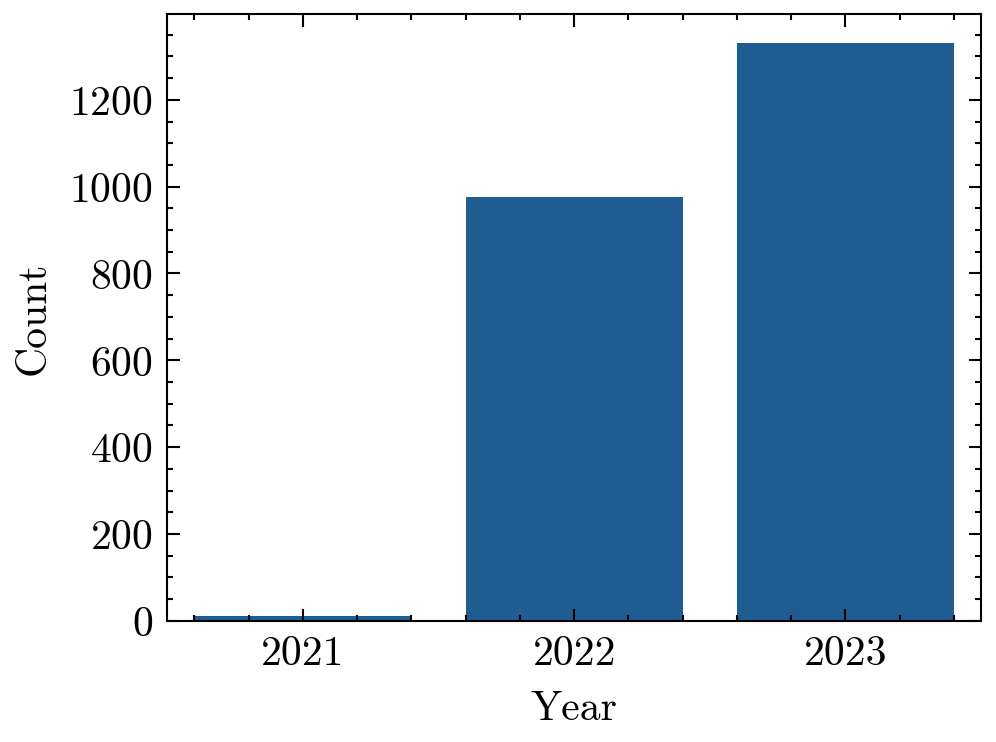

In [25]:
fig, ax = plt.subplots()
sns.countplot(data=df_occurence, x="ts_y", ax=ax)
ax.set_ylabel("Count")
ax.set_xlabel("Year")

fig.savefig("FIG-1a.jpg")
fig.savefig("FIG-1a.pdf")
plt.show()

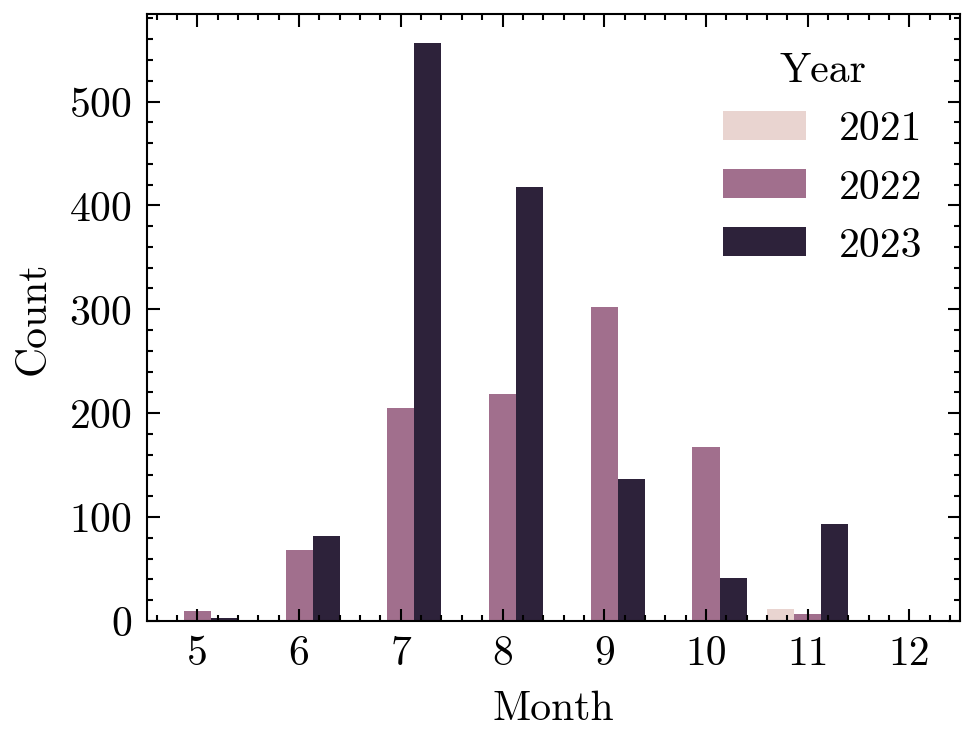

In [26]:
fig, ax = plt.subplots()
g = sns.countplot(data=df_occurence, x="ts_m", hue="ts_y", ax=ax)
g.figure.get_axes()[0].legend(title='Year', loc='upper right')
ax.set_ylabel("Count")
ax.set_xlabel("Month")

fig.savefig("FIG-1b.jpg")
fig.savefig("FIG-1b.pdf")
plt.show()

In [7]:
dd = df_occurence.groupby(["ts_y", "ts_m"]).count()["occurrenceID"].reset_index()
dd

,ts_y,ts_m,occurrenceID
0,2021,11,11
1,2022,5,9
2,2022,6,68
3,2022,7,205
4,2022,8,218
5,2022,9,302
6,2022,10,167
7,2022,11,7
8,2022,12,1
9,2023,5,3


## Spatial Plots

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [18]:
gpd_geom = gpd.read_file("../dataset/africa/shp/grid-sea-africa-zoned.shp")
# gpd_geom = gpd.read_file("../dataset/australia/shp/grid-sea-australia-zoned.shp")
gpd_geom.head(2)

,id,left,top,right,bottom,row_index,col_index,MINX,MINY,MAXX,MAXY,CNTX,CNTY,AREA,PERIM,HEIGHT,WIDTH,ZONE_ID,geometry
0,110.0,18.614758,-34.063676,18.914758,-34.363676,109.0,0.0,20.614758,-34.461992,57.770783,-3.363676,39.19277,-18.912834,1155.489807,136.508682,31.098316,37.156025,1,"MULTIPOLYGON (((18.91476 -34.36368, 18.89379 -..."
1,111.0,18.614758,-34.363676,18.914758,-34.663676,110.0,0.0,20.614758,-34.461992,57.770783,-3.363676,39.19277,-18.912834,1155.489807,136.508682,31.098316,37.156025,2,"POLYGON ((18.80851 -34.36368, 18.81972 -34.378..."


In [20]:
df_vis = df_occurence[df_occurence["longitude"] < 60]
# df_vis = df_occurence[df_occurence["longitude"] > 110]
print(df_vis.shape)
df_vis.head()

(1966, 9)


,occurrenceID,ts,latitude,longitude,species,geometry,ts_y,ts_m,ts_ym
0,409742,2023-11-30 09:44:11,-25.363597,46.837436,Megaptera novaeangliae,POINT (46.83744 -25.3636),2023,11,2023-11
1,403039,2023-11-21 00:00:00,-21.220602,55.205602,Megaptera novaeangliae,POINT (55.2056 -21.2206),2023,11,2023-11
3,403038,2023-11-14 00:00:00,-21.235409,55.226194,Megaptera novaeangliae,POINT (55.22619 -21.23541),2023,11,2023-11
4,403037,2023-11-13 00:00:00,-21.269454,55.201475,Megaptera novaeangliae,POINT (55.20148 -21.26945),2023,11,2023-11
5,403035,2023-11-08 00:00:00,-21.198070,55.195273,Megaptera novaeangliae,POINT (55.19527 -21.19807),2023,11,2023-11


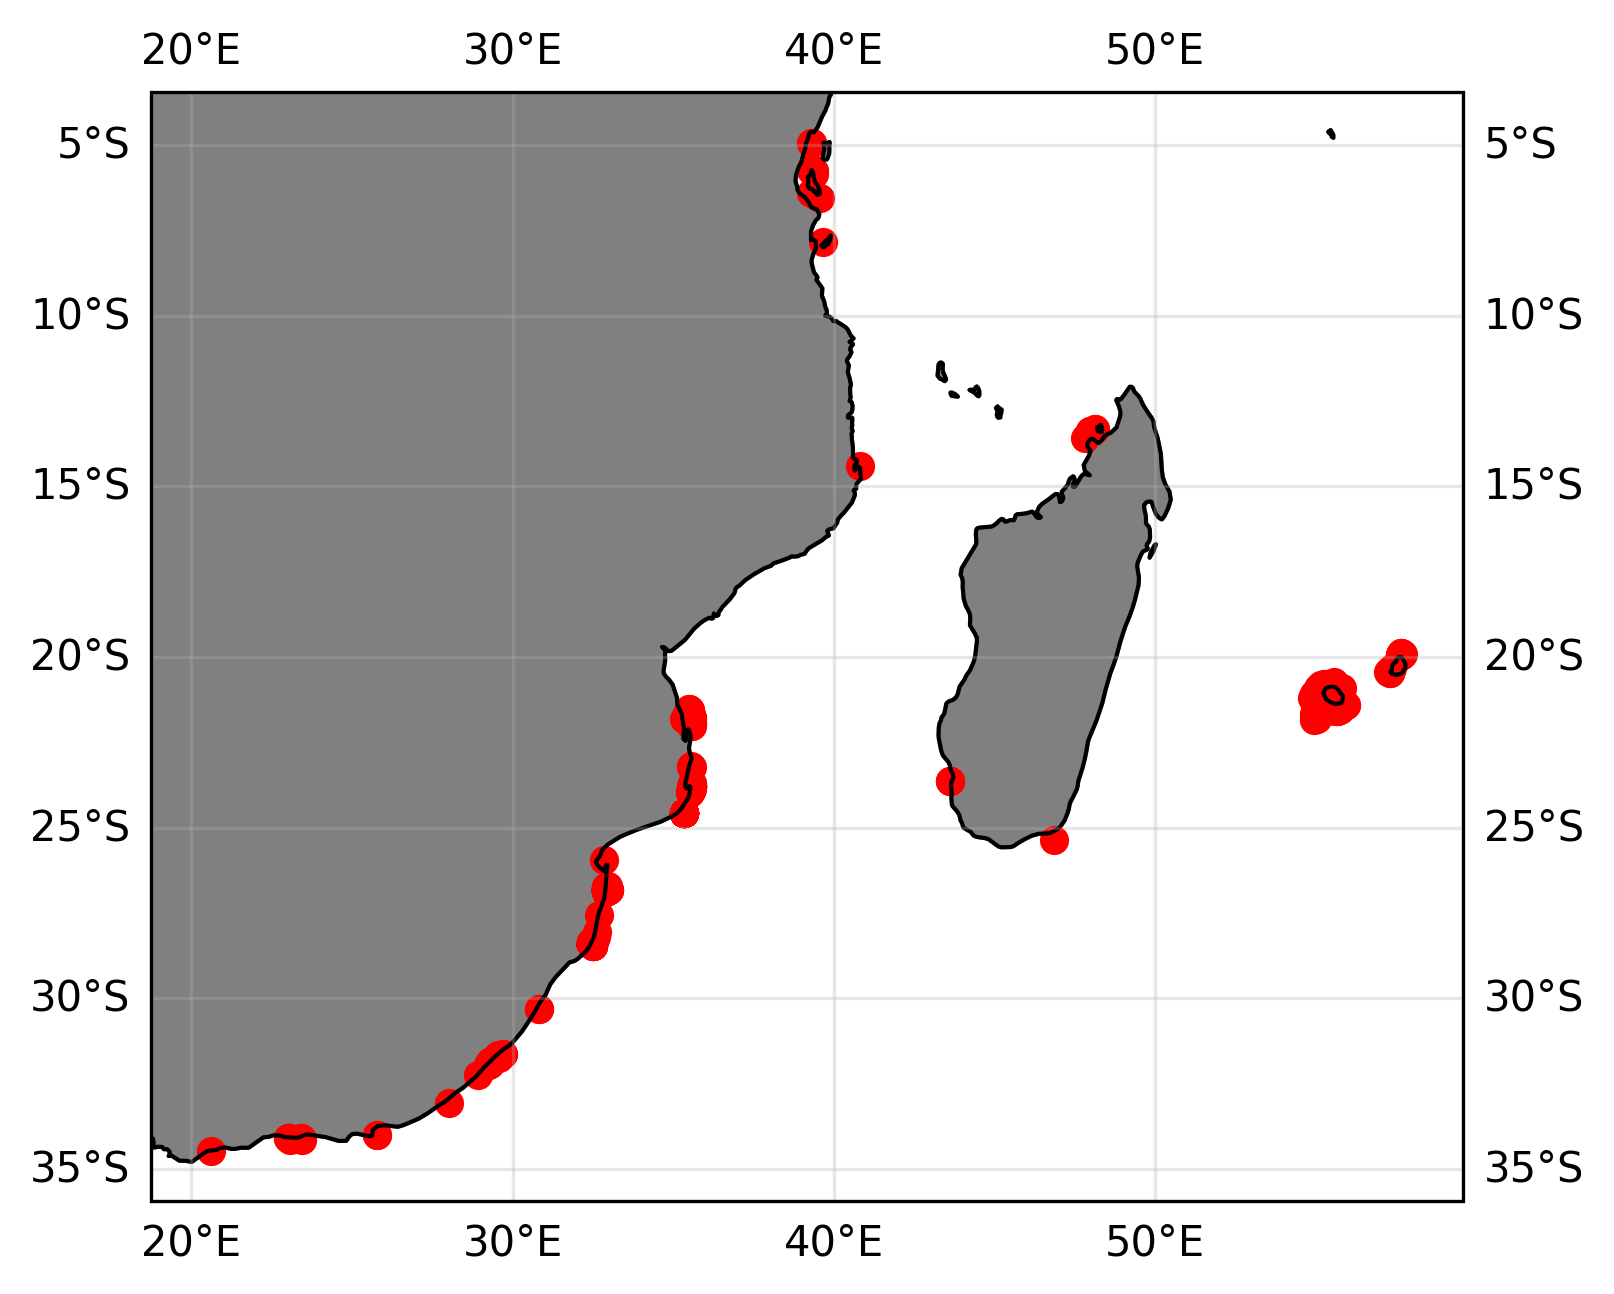

In [21]:
# plot
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
ax.add_feature(cfeature.LAND, color='grey')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.3)
# gpd_geom.plot(ax=ax)
df_vis.plot(ax=ax, color="red")

fig.savefig("FIG-2a.jpg")
fig.savefig("FIG-2a.pdf")
plt.show()